<a href="https://colab.research.google.com/github/madhulathachavali/AIML/blob/main/Pima_Indians_Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pima Indian Diabetes Analysis**
This dataset is taken from National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the analysis is to predict whether the patient has diabetes or not based on the measurements given in the dataset. All the patients are females above 21 years old and belong to Pima Indian heritage.

**Data Information:**


1. Pregnancies: No of times pregnant
2. Glucose: Glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: blood pressure (mm Hg)
4. SkinThickness: skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: weight in kg/(height in m)^2
7. DiabetesPedigreeFunction: pedigree function
8. Age: Age (years)
9. Outcome: variable (0 or 1) 268 of 768 are 1, the others are 0




**1. Import the packages and load the data**

In [1]:
# Load the necessary packages
import numpy as np                                    
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [2]:
pip install plotly==5.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Change directory when needed
data_path ="/content/drive/My Drive/Data/diabetes.csv"

In [7]:
data=pd.DataFrame(pd.read_csv(data_path))

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
##Identify duplicates records in the data. No duplicates in the dataset
dupes = data.duplicated()
sum(dupes)
#Removing Duplicates
#data =data.drop_duplicates()

0

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.isnull().sum() # No missing values in the data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.shape

(768, 9)

In [14]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
data["Outcome"].value_counts() # 500 patients don't have diabetes and 268 have diabetes. Data is unbalanced as each category doesnot have equal number patients.

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
# data[data['Insulin']==0].shape[0]

**Insights:**
1.    There are no missing or duplicate values in the dataset.
2.    Most of the data-types are either int64 or float64.


---




**2. Data Visualization**

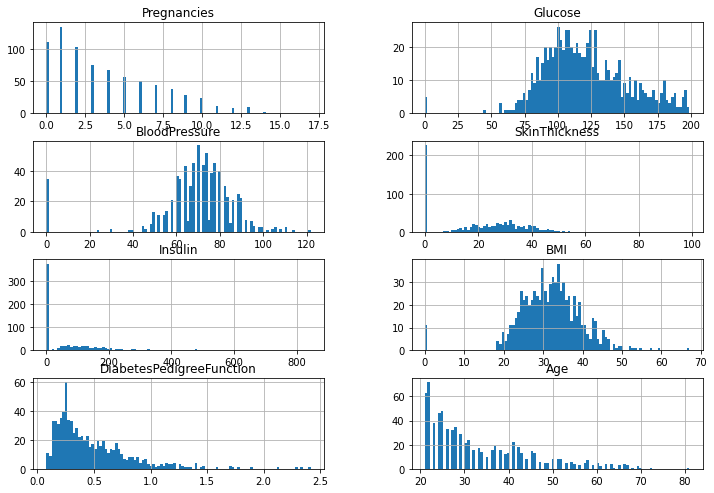

In [18]:
columns = list(data)[0:-1] # Excluding Outcome column which has only 
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

Note: Some of the variables have zeros, which should replaced with mean of the column. 

In [19]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(data, x="Glucose", y="Outcome")
fig.show()

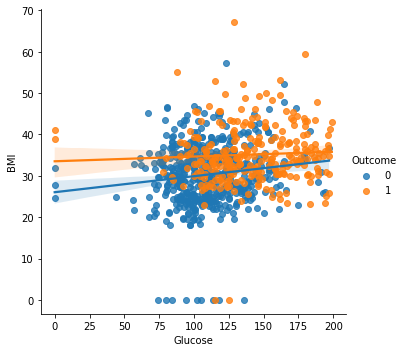

In [20]:
sns.lmplot(y="BMI", x="Glucose", hue = 'Outcome',data=data, palette='tab10');

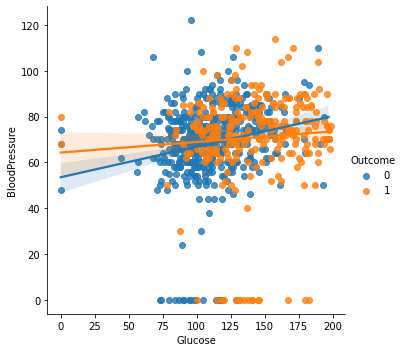

In [21]:
sns.lmplot(y="BloodPressure", x="Glucose", hue = 'Outcome',data=data, palette='tab10');

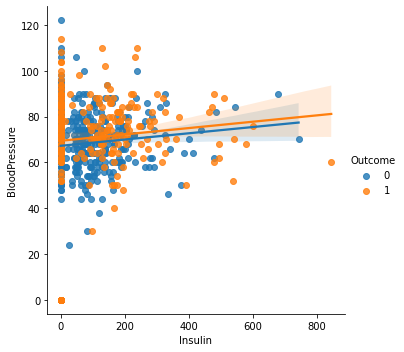

In [22]:
sns.lmplot(y="BloodPressure", x="Insulin", hue = 'Outcome',data=data, palette='tab10');

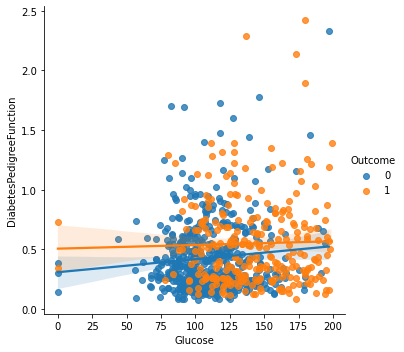

In [23]:
sns.lmplot(y="DiabetesPedigreeFunction", x="Glucose", hue = 'Outcome',data=data, palette='tab10');

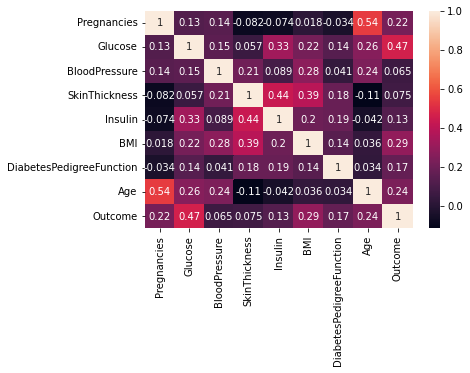

In [24]:
sns.heatmap(data.corr(),annot=True);

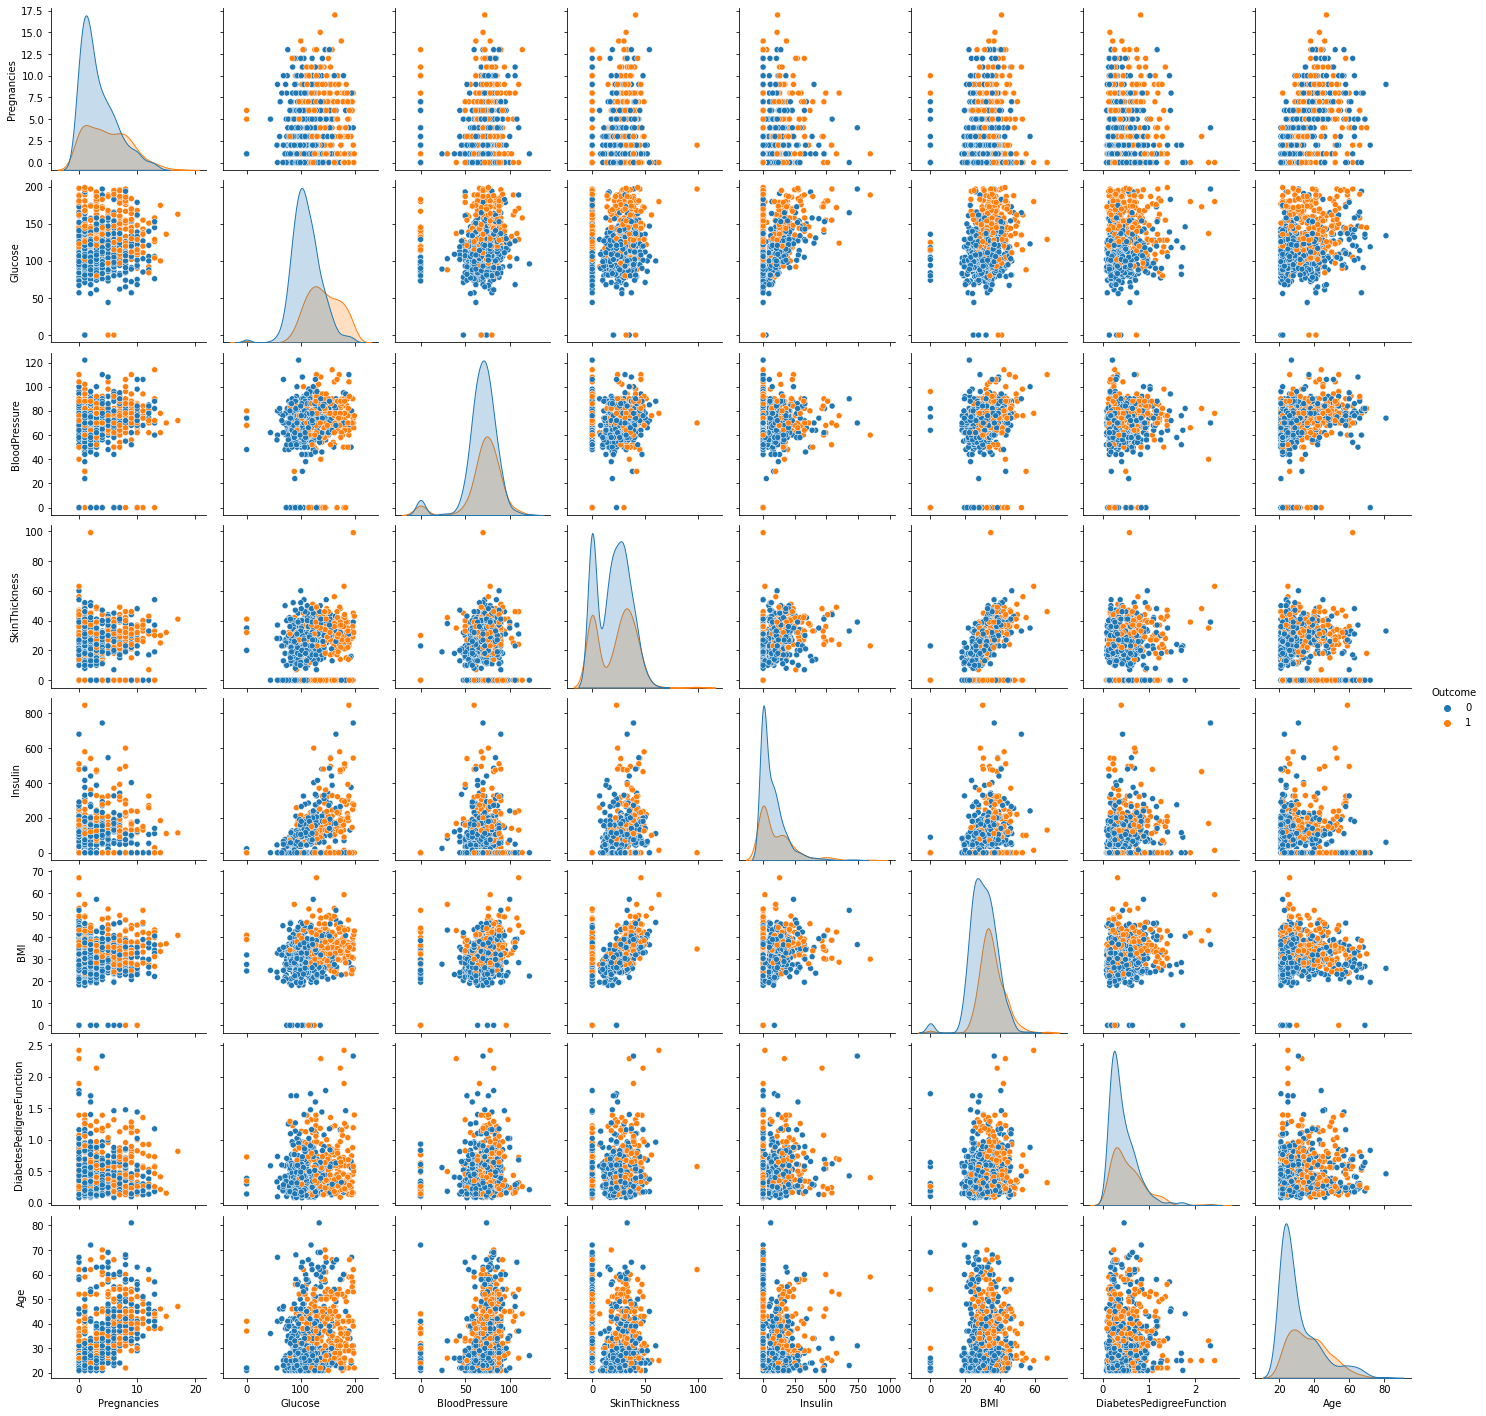

In [25]:
sns.pairplot(data, hue='Outcome', diag_kind='kde');

**Insight:**

1. There is strong correlation between Glucose and outcome (0.47), insulin and skinthickness (0.44), BMI and skinthickness (0.39).



---






3. Preprocessing

In [26]:
# data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean()) # Insulin has '0' values in the column. Replace 0s with mean Insulin

In [27]:
# imputer to replace zeros in dataset
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="median") # replacing with median because the columns have extreme values
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
imputer = rep_0.fit(data[cols])
data[cols] = imputer.transform(data[cols])

4. Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = data.drop(['Outcome'], axis=1) # Predictor feature columns (7 X m)
Y = data['Outcome'] #Predicted class (1=True, 0=False) (1 X m)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43
467,0,97.0,64.0,36.0,100.0,36.8,0.600,25
550,1,116.0,70.0,28.0,125.0,27.4,0.204,21
147,2,106.0,64.0,35.0,119.0,30.5,1.400,34
481,0,123.0,88.0,37.0,125.0,35.2,0.197,29


In [31]:
# Check the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

69.92% data is in training set
30.08% data is in test set


In [32]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 1]), (len(data.loc[data['Outcome'] == 1])/len(data.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 0]), (len(data.loc[data['Outcome'] == 0])/len(data.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 183 (34.08%)
Training Diabetes False Values   : 354 (65.92%)

Test Diabetes True Values        : 85 (36.80%)
Test Diabetes False Values       : 146 (63.20%)



Model Building

Following models will been evaluated:

1. Logistic regression
2. Decision Tree entropy
3. Bagging
4. Gradient Boosting
5. Random Forest


The performance metrics:

· Precision Score: proportion of correct predictions out of all predicted diabetic cases.

· Recall Score: proportion of correct predictions out of all actual diabetic cases.

· Area Under ROC Curve: prediction scores from area under Receiver Operating Characteristic (ROC) curve, which is a relationship between True Positive Rate and False Positive Rate.

5.1 Logistic Regression

In [33]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [70]:
# Fit the model on train
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

# Predict on test
y_predict = model.predict(x_test)

In [36]:
model.score(x_train,y_train)

0.7635009310986964

In [37]:
model_score = model.score(x_test,y_test)
model_score

0.7792207792207793

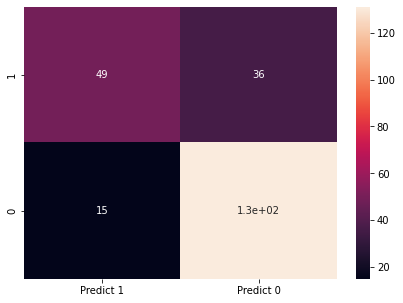

In [38]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

data_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot=True)

The confusion matrix
True Positives (TP): We correctly predicted that they have diabetes 49
False Positives (FP): We incorrectly predicted that they have diabetes 15 ("Type I error")
True Negatives (TN): We correctly predicted that they do not have diabetes 0
False Negative (FN): We incorrectly predicted that they do not have diabetes 36 ("Type II error")


In [39]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
## importing necessary metrics to evaluate model performance

In [40]:
recall_score(y_test,y_predict)

0.5764705882352941

In [41]:
precision_score(y_test,y_predict)

0.765625

In [42]:
f1_score(y_test,y_predict)

0.6577181208053692

In [43]:
roc_auc_score(y_test,y_predict)

0.7368654311039484

In [44]:
 !pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



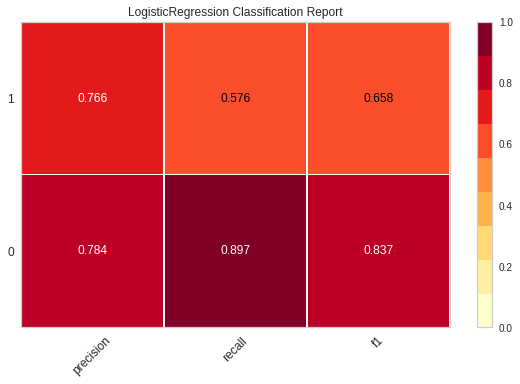

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



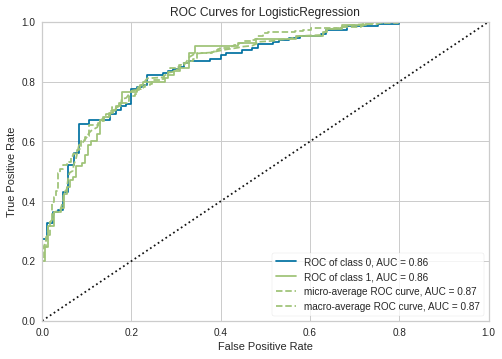

In [45]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [46]:
# Observe the predicted and observed classes in a dataframe.

z = x_test.copy()
z['Observed Outcome'] = y_test
z['Predicted Outcome'] = y_predict


In [47]:
z[z['Observed Outcome']!=z['Predicted Outcome']] # 51 rows where predicted target variable is not equal to actual target variable

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Observed Outcome,Predicted Outcome
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1,0
493,4,125.0,70.0,18.0,122.0,28.9,1.144,45,1,0
218,5,85.0,74.0,22.0,125.0,29.0,1.224,32,1,0
667,10,111.0,70.0,27.0,125.0,27.5,0.141,40,1,0
750,4,136.0,70.0,29.0,125.0,31.2,1.182,22,1,0
577,2,118.0,80.0,29.0,125.0,42.9,0.693,21,1,0
558,11,103.0,68.0,40.0,125.0,46.2,0.126,42,0,1
187,1,128.0,98.0,41.0,58.0,32.0,1.321,33,1,0
400,4,95.0,64.0,29.0,125.0,32.0,0.161,31,1,0
535,4,132.0,72.0,29.0,125.0,32.9,0.302,23,1,0


Note: R-squared/ coefficient of determination/coefficient of multiple determination for multiple regression is a measure of how close the data are to the fitted regression line. 
R-squared = Explained variation / Total variation

Range 0 to 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.

Note: Lower values of MSE indicates a better fit. It is measurement of how close the predicted values to actual. MSE = 0 is perfect model

Both R2 score and MSE are very good.
This means that we have found a good fitting model to predict whether a patient is diabetic or not.

5.2 Decision Tree Classifier


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [49]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=4, min_samples_leaf=50, min_samples_split=120)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=120)

In [50]:
model_gini.score(x_train, y_train)  # performance on train data


0.7635009310986964

In [51]:
model_gini.score(x_test, y_test)  # performance on test data

0.8138528138528138

Note: The performance on training data is 0.76 while for test data, it's 0.81. 

In [52]:
predictions = model_gini.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8138528138528138


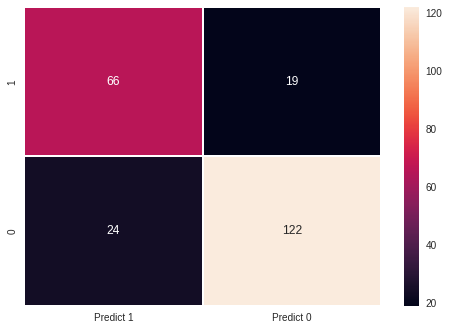

In [53]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix, classification_report
cm2= metrics.confusion_matrix(y_test, predictions, labels=[1,0])
cf_matrix = pd.DataFrame(cm2, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

In [54]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       141
           1       0.78      0.73      0.75        90

    accuracy                           0.81       231
   macro avg       0.81      0.80      0.80       231
weighted avg       0.81      0.81      0.81       231



In [55]:
# Visualization of Decision Tree
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
from io import StringIO
import pydotplus
import graphviz

In [56]:
column_names = list(data.columns)
column_names.remove('Outcome')       # Keep only names of features and remove target variable
feature_names = column_names
print(feature_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


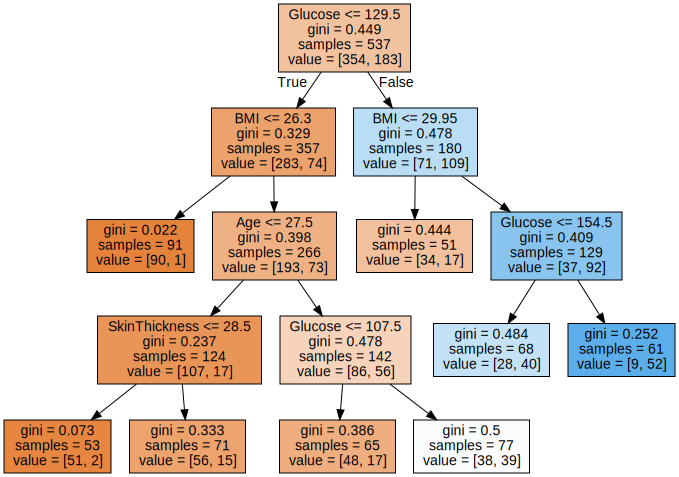

In [57]:
# DOT data
dot_data = tree.export_graphviz(model_gini, out_file=None, 
                                feature_names=feature_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

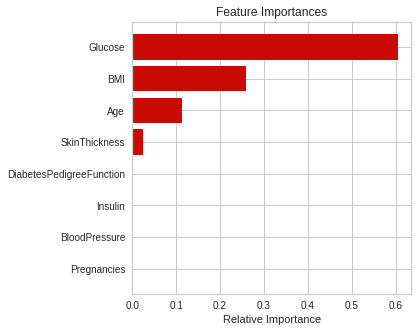

In [58]:
# Understanding Feature Importance
importances = model_gini.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Insights:
1. From the root of the decision tree, Glucose, BMI and age features give the most information context to differentiate the true and false classes.
2. This is also seen in feature importance.
2. Other models can be built using importance features to further increase accuracy.


5.3 Bagging

In [59]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=model_gini, n_estimators=100,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)
bgcl.score(x_train, y_train)

0.7635009310986964

0.7662337662337663


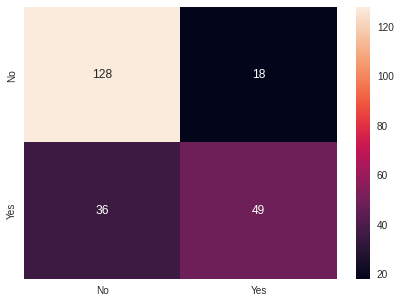

In [60]:
y_predict_bgcl = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm3=metrics.confusion_matrix(y_test, y_predict_bgcl,labels=[0, 1])

df_cm = pd.DataFrame(cm3, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

5.4 AdaBoosting

In [62]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.7835497835497836


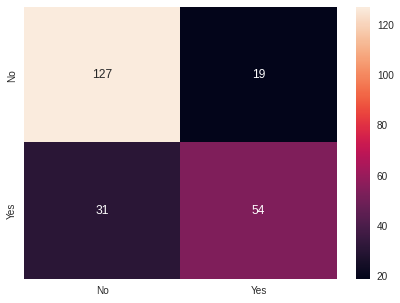

In [63]:
y_predict_abc1 = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm4=metrics.confusion_matrix(y_test, y_predict_abc1,labels=[0, 1])

df_cm = pd.DataFrame(cm4, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

5.5 Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.8008658008658008


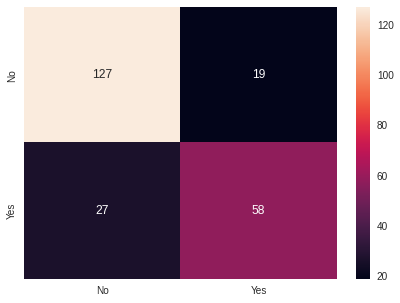

In [65]:
y_predict_gbc1 = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm5=metrics.confusion_matrix(y_test, y_predict_gbc1,labels=[0, 1])

df_cm = pd.DataFrame(cm5, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

5.6 RandomForest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=5)
rfcl = rfcl.fit(x_train, y_train)

0.7878787878787878


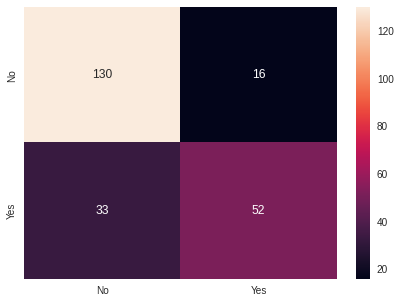

In [68]:
y_predict_rfc1 = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm6=metrics.confusion_matrix(y_test, y_predict_rfc1,labels=[0, 1])

df_cm = pd.DataFrame(cm6, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

**Conclusion**

Glucose, BMI and age features give the most information context to differentiate the true and false classes.


Of all the models, Decision tree classifier performed well with 
model score 76% on training data and 81% on test data. The model can predict if the patient has diabetes with 78% precision, 73% recall and 75% F1 score and it can predict the patient doesn't have diabetes with 84% precision, 87% recall and 85% F1score.

Below is overview of predictions using confusion matrix.

True Positive (observed=1,predicted=1): 66

Predicted that patient has diabetes and the patient has it.

False Positive (observed=0,predicted=1): 24

Predicted that patient has diabetes and the patient doesnot have it.

True Negative (observed=0,predicted=0): 122

Predicted that patient doesnot have diabetes and the patient actually doesnot have it.

False Negative (observed=1,predicted=0): 19

Predicted that patient does have diabetes and the patient doesnot have it.




**Appendix**

warnings.filterwarnings("ignore") : Never print matching warnings.

Pandas : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Numpy : The fundamental package for scientific computing with Python.

Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

pairplot : Plot pairwise relationships in a dataset.

heatmap : Draw a heatmap of rectangular data as a color-encoded matrix.

distplot : Flexibly plot a univariate distribution of observations.

pandas.DataFrame.corr : Compute pairwise correlation of columns, excluding NA/null values.

sklearn.linear_model.LogisticRegression : Logistic Regression (aka logit, MaxEnt) classifier.

yellowbrick : Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it uses Matplotlib

**Acknowledgments**

I worked on this project as part of the AIML post-graduate program offered by the University of Texas, Austin.